### Suppose we have `n` features and `m` observations

| Index        | $X_{1}$       | $X_{2}$       | $X_{3}$       | .... | .... | $X_{n}$        | y        |
|--------------|---------------|---------------|---------------|------|------|----------------|----------|
| 1            | $x_{1}^{1} $  | $x_{2}^{1}$   | $x_{3}^{1}$   | ...  | ...  | $x_{n}^{1}$    | $y^{1}$  |
| 2            | $x_{1}^{2}$   | $x_{2}^{2}$   | $x_{3}^{2}$   | ...  | ...  | $x_{n}^{2}$    | $y^{2}$  |
| 3            | $x_{1}^{3}$   | $x_{2}^{3}$   | $x_{3}^{3}$   | ...  | ...  | $x_{n}^{3}$    | $y^{3}$  |
| .            | .             | .             | .             | ...  | ...  | .              |          |
| .            | .             | .             | .             | ...  | ...  | .              |          |
| .            | .             | .             | .             | ...  | ...  | .              |          |
| m            | $x_{1}^{m}$   | $x_{2}^{m}$   | $x_{3}^{m}$   | ...  | ...  | $x_{n}^{m}$    | $y^{m}$  |

Here `subscript` denotes feature and `superscript` denote observation number

Suppose the weights of matrix for n features is denoted by column vectors of shape [1, n]
<br/>
$$ \beta = \begin{bmatrix} \beta_{1} & \beta_{2} & \beta_{3} & .... &  \beta_{n} \end{bmatrix} $$

### we need to calculate prediction for each observation

\begin{equation}
\hat{y^1} = \beta_{0} + \beta_{1}x_{1}^{1} +  \beta_{2}x_{2}^{1}  +  \beta_{3}x_{3}^{1}  +  \beta_{3}x_{3}^{1} + .... + \beta_{n}x_{n}^{1}
\end{equation}

\begin{equation}
\hat{y^2} = \beta_{0} + \beta_{1}x_{1}^{2} +  \beta_{2}x_{2}^{2}  +  \beta_{3}x_{3}^{2}  +  \beta_{3}x_{3}^{2} + .... + \beta_{n}x_{n}^{2}
\end{equation}


\begin{equation}
\hat{y^3} =  \beta_{0} +\beta_{1}x_{1}^{3} +  \beta_{2}x_{2}^{3}  +  \beta_{3}x_{3}^{3}  +  \beta_{3}x_{3}^{3} + .... + \beta_{n}x_{n}^{3}
\end{equation}

\begin{equation}
 ..................
\end{equation}

\begin{equation}
 ..................
\end{equation}

\begin{equation}
\hat{y^m} =  \beta_{0} +\beta_{1}x_{1}^{m} +  \beta_{2}x_{2}^{m}  +  \beta_{3}x_{3}^{m}  +  \beta_{3}x_{3}^{m} + .... + \beta_{n}x_{n}^{m}
\end{equation}

### In matrix form 

\begin{equation}
\begin{bmatrix} \hat{y}^{1} \\ \hat{y}^{2} \\ \hat{y}^{3} \\ .. \\.. \\  \hat{y}^{m} \end{bmatrix} = 
\begin{bmatrix} x_{1}^{1} & x_{2}^{1} & x_{3}^{1} & .... &  x_{n}^{1}
           \\ x_{1}^{2} & x_{2}^{2} & x_{3}^{2} & .... &  x_{n}^{2}
           \\ x_{1}^{3} & x_{2}^{3} & x_{3}^{3} & .... &  x_{n}^{3}
           \\.... &.... & ... &.... &....
           \\.... &.... & ... &.... &....
            \\ x_{1}^{m} & x_{2}^{m} & x_{3}^{m} & .... &  x_{n}^{m}
\end{bmatrix}
*
\begin{bmatrix} \beta_{1} \\ \beta_{2} \\ \beta_{3} \\ .. \\.. \\  \beta_{n} \end{bmatrix}
+ \beta_{0}
\end{equation}

\begin{equation} \hat{y} = X.\beta^{T} + \beta_{0} \end{equation}

#### Equivalent numpy implementation is:

   \begin{equation} \hat{y} = np.dot(X, \beta.T) + \beta_{0} \end{equation}

### The Mean Squared Error cost function is:

$$ J(\beta, \beta_{0}) = \frac{1}{2m}\sum_{n=1}^{m}   (y - \hat{y})^{2} $$

#### Equivalent numpy implementation is:

`cost = (1/(2*m))*np.sum((y-y_hat)**2)`

### Just for confirmation let us take an example

| y | $\hat{y}$ | (y - $\hat{y}$)^2 |
|---|---------|-----------------|
| 2 | 1       | 1               |
| 4 | 2       | 4               |
| 6 | 3       | 9               |
|  |        | 14               |

\begin{equation} 14/3 = 4.67 \end{equation}

In [21]:
import numpy as np

y=np.array([[2],
           [4],
           [6]])
y_hat=np.array([[1],
           [2],
           [3]])

In [22]:
np.sum((y-y_hat)**2)/3

4.666666666666667

### Now lets calculate the gradient descent

### We have the loss function  defined as

$$ J(\beta, \beta_{0}) = \frac{1}{2m}\sum_{n=1}^{m}   (y - \hat{y})^{2}   $$

where: $$ \hat{y} = \beta_{0} + X*\beta^{T} $$

So:
$$ \frac {\partial J(\beta, \beta_{0})}{\partial \beta_{0}} = 
\frac{-1}{m}\sum_{n=1}^{m}(y-\hat{y}) $$

Again: $$ J(\beta, \beta_{0}) = \frac{1}{2m}\sum_{n=1}^{m}   (y - \hat{y})^{2}   $$

$$ \frac {\partial J(\beta, \beta_{0})}{\partial \beta} = \frac{-1}{m}\sum_{n=1}^{m}   (y - \hat{y}) * \frac{\partial (\beta_{0} + X*\beta^{T})}{\partial \beta} $$

$$ \frac {\partial J(\beta, \beta_{0})}{\partial \beta} = 
\frac{-1}{m}\sum_{n=1}^{m}(y-\hat{y})*X * \frac{\partial \beta^{T}}{\partial \beta} $$

where $$ \beta = \begin{bmatrix} \beta_{1} & \beta_{2} & \beta_{3} &.... & \beta_{n} \end{bmatrix}$$ 

and

$$ \beta^{T} = \begin{bmatrix} \beta_{1} \\ \beta_{2} \\ \beta_{3} \\.... \\ \beta_{n} \end{bmatrix}$$ 


Since: $$ \frac{\partial \beta^{T}}{\partial \beta} =1 $$

So: $$ \frac {\partial J(\beta, \beta_{0})}{\partial \beta} = 
\frac{-1}{m}\sum_{n=1}^{m}(y-\hat{y})*X $$

### Shape of $$ \sum_{n=1}^{m}(y-\hat{y}) $$  `m rows and 1 cols [m, 1]`

### Shape of `X is [m, n] ie m observations and n features`

### Required shape of `dB is [1, n] `

### [1, m] * [m, n] == [1, n]

## Equivalent Numpy Implementation is:

 `dB = (1/m)* np.dot((y-y_hat).T, X)`
 <br/>
  `db = (1/m)*np.sum(y-y_hat)`

In [23]:
def propagate(B, b, X, Y):
    """
    params:
    B: weights of size [1, X.shape[0]]
    b: bias
    X: matrix of observations and features size [X.shape[0], X.shape[1]]
    Y: matrix of actual observation size [Y.shape[0], 1]
    
    returns:
    grads: dict of gradients, dB of shape same as B and db of shape [1, 1].
    cost: MSE cost of shape [m, 1]
    """
    
    ## m is no of observations ie rows of X
    m = X.shape[0]
    
    #Calculate hypothesis
    y_hat = np.dot(X, B.T) + b
    
    y = Y.values.reshape(Y.shape[0],1)
    
    #Compute Cost
    cost = (1/(2*m))*np.sum((y-y_hat)**2)
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dB = (-1/m)* np.dot((y-y_hat).T, X)
    
    db = -np.sum(y-y_hat)/m
    
    grads = {"dB": dB,
             "db": db}
    
    return grads, cost

In [24]:
def optimize(B, b, X, Y, num_iterations, learning_rate):
    """
    params:
    B: weights of size [1, X.shape[0]]
    b: bias
    X: matrix of observations and features size [X.shape[0], X.shape[1]]
    Y: matrix of actual observation size [Y.shape[0], 1]
    num_iterations: number of iterations
    learning_rate: learning rate
    returns:
    params: parameters B of shape [1, X.shape[0]] and bias
    grads: dict of gradients, dB of shape same as B and db
    costs:  MSE cost 
    """
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation call function propagate
        grads, cost = propagate(B,b,X,Y)
        
        # Retrieve derivatives from grads
        dB = grads["dB"]
        db = grads["db"]
        
        # update parameters
        B = B - learning_rate * dB
        b = b - learning_rate * db
        
        costs.append(cost)
    
    params = {"B": B,
              "b": b}
    
    grads = {"dB": dB,
             "db": db}
    
    return params, grads, costs

In [25]:
def predict(B, b, X):
    """:param
    B: weights
    b: bias
    X: matrix of observations and features
    """
  # Compute predictions for X
    Y_prediction = np.dot(X, B.T) + b
    return Y_prediction

In [26]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    """
    params: 
    X_train: X_train
    Y_train: Y_train
    X_test: X_test
    Y_test: Y_test
    
    returns:
    d: dictionary
    """
    
    
    # initialize parameters with zeros 
    B = np.zeros(shape=(1, X_train.shape[1]))
    b = 0
    
    # Gradient descent
    parameters, grads, costs = optimize(B, b, X_train, Y_train, num_iterations, learning_rate)
    
    # Retrieve parameters w and b from dictionary "parameters"
    B = parameters["B"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(B, b, X_test)
    Y_prediction_train = predict(B, b, X_train)
    
    Y_train = Y_train.values.reshape(Y_train.shape[0], 1)
    Y_test = Y_test.values.reshape(Y_test.shape[0], 1)

   # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "B" : B, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [27]:
import pandas as pd
df = pd.read_csv('USA_Housing.csv')

In [28]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [29]:
df.drop(['Address'],axis=1,inplace=True)

In [30]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.5 KB


In [32]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler()

df_norm = (df - df.mean()) / (df.max() - df.min())

# Putting feature variable to X
X = df_norm[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]

# Putting response variable to y
y = df_norm['Price']


X = pd.DataFrame(pre_process.fit_transform(X))

#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=2)



In [33]:
df_norm.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.121932,-0.042817,0.002844,0.024149,-0.188292,-0.070538
1,0.118631,0.003735,-0.034156,-0.198073,0.057734,0.111620
2,-0.081153,-0.016194,0.202692,0.255260,0.010348,-0.070557
3,-0.058260,0.176153,-0.186228,-0.160296,-0.026685,0.011636
4,-0.095667,-0.136247,0.113193,0.055260,-0.141246,-0.245046


In [34]:
X_train.shape

(3500, 5)

In [35]:
X_train.head()

,0,1,2,3,4
2416,1.093700,-0.994827,0.029344,-0.616954,-0.190678
2417,-0.799519,-1.823848,0.393455,-0.600747,0.925414
2513,-0.161419,1.520562,-0.749671,-0.398156,-2.099606
1698,-0.285239,-2.048999,0.434017,1.943795,-0.727932
3322,0.257655,-0.107375,-0.970804,-1.200416,-0.949652


In [36]:
# y_train.reshape(y_train.shape[0],1)

In [37]:
y_test.shape[0]

1500

In [38]:
model1 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.001)

model2 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.01)

model3 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 500, learning_rate = 0.1)

train accuracy: 92.51955817871108 %
test accuracy: 92.59061713070582 %
train accuracy: 96.6511109236307 %
test accuracy: 96.72543736090067 %
train accuracy: 96.65585054636293 %
test accuracy: 96.74241441485935 %


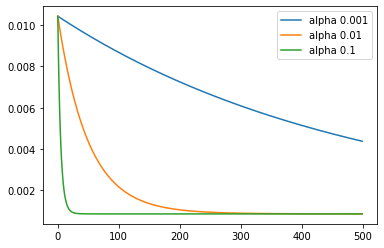

In [39]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(500)], model1['costs'])
plt.plot([i for i in range(500)], model2['costs'])
plt.plot([i for i in range(500)], model3['costs'])

plt.gca().legend(('alpha 0.001','alpha 0.01', 'alpha 0.1'))
plt.show()

In [40]:
# model4 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 10, learning_rate = 0.01)

# model5 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 100, learning_rate = 0.01)

# model6 = model(X_train=X_train, Y_train=y_train, X_test=X_test, Y_test=y_test, num_iterations = 1000, learning_rate = 0.01)